# SVM

## Introdução

Os SVMs (Support Vector Machines ou Máquinas de Vetores de Suporte) são um grupo de algoritmos de aprendizado 'supervisionado utilizado para regressão e classificação.

A ideia por trás desses algoritmos é separar diferentes classes com uma reta ou hiperplano que mantém a maior margem de erro possível para manter uma margem de erro para futuras classificações.

<img src='https://miro.medium.com/max/640/1*DW6xRZ9ylA3JMnlfNFuuBg.webp' width=400>

## Vantagens e desvantagens

### Vantagens
* Efetivo em espaços multidimensionais e mesmo quando o número de dimensões é maior que o número de amostras
* Eficiente no custo de memória
* Versátil: Existem múltiplas funções kernel que podem lidar melhor com diferentes tipos de dados para obter o classificador
### Desvantagens
* Resultado dificilmente interpretável
* Complexidade para os cálculos aumenta rapidamente com o tamanho do dataset

## Base matemática e algoritmo

As máquinas de vetores de suporte constroem um ou mais hiperplanos em um espaço multidimensional para separar diferentes classes.

<img src='https://miro.medium.com/max/720/1*ZpkLQf2FNfzfH4HXeMw4MQ.png'>

Para isso, é definido um hiperplano wx=b que deve satisfazer às seguintes condições:

<img src='https://miro.medium.com/max/640/1*sWNTINUxUILiinqxOzvRYQ.png'>

sendo:
* w um vetor composto pelo peso das features
* x é o valor da feature

Após definido o hiperplano, os algoritmos tentam maximizar a margem como mostrado abaixo.

<img src='https://miro.medium.com/max/720/1*a46Tz42Epfu3ysFnvWpzWQ.gif' 
width=600>

## Multiclasses

Um obstáculo ao tentar separar duas classes com uma única reta ou hiperplano é a classificação quando há mais do que 2 classes.

Nesse caso, um jeito simples de lidar com isso é tentar separar uma única classe do resto, classificar as tuplas e refazer isso para cada classe.

<img src='https://www.baeldung.com/wp-content/uploads/sites/4/2020/10/multiclass-svm3-e1601952776445.png'>

## SVM não linear

Outra dificuldade nesses tipos de problemas é quando os dados não podem ser separados com uma reta ou hiperplano de forma visível.

Então é feita uma transformação do espaço por meio de uma função kernel (scikit learn oferece as opções linear, polinomial, exponencial ou sigmoide) convertendo-o para um espaço de maior dimensão onde os dados são linearmente separáveis.

Até o R³ essas transformações podem ser visíveis, como mostrado na figura abaixo, mas deixa de ser intuitivo para dimensões ainda maiores.

<img src='https://miro.medium.com/max/838/1*gXvhD4IomaC9Jb37tzDUVg.png'>

### Parâmetros importantes

* C: Parâmetro de regularização. É uma relação entre a maior margem mínima e a classificação correta dos exemplos

<img src='https://miro.medium.com/max/640/0*z00-0ici9ikQLBug.jpg'>

* Gamma: Define o quanto um único exemplo de treinamento influencia nas fronteiras

<img src='https://vitalflux.com/wp-content/uploads/2020/07/C-Values-Page-3-1024x832.png' width=700>

* Kernel: Específica a função de kernel a ser usada. Diferentes funções podem ser mais eficientes para diferentes distribuições de dados


**É recomendado o teste de diferentes combinações desses parâmetros por meio de grid search para encontrar uma combinação que melhor satisfaz os seus propósitos.**

## Aplicações

* Classificação de imagens incluindo detecção de faces e reconhecimento da letra de uma pessoa
* Classificação de proteínas, cancer e genes
* Classificação de texto

## Exemplo

Nesse exemplo é utilizado o "breast cancer wisconsin dataset" fornecido pelo sci kit learn.

Esse dataset possui 569 exemplares com 30 características e o objetivo é classificar cada um em 'benigno' ou 'maligno'.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Modelo

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(data.data, data.target, test_size=0.3, random_state=0)

clf = SVC()
clf.fit(x_treino, y_treino)
predicao = clf.predict(x_teste)

### Resultados

              precision    recall  f1-score   support

           0       0.98      0.81      0.89        63
           1       0.90      0.99      0.94       108

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.91       171
weighted avg       0.93      0.92      0.92       171



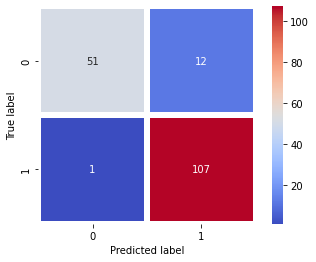

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print(classification_report(y_teste, predicao))

matriz_confusao = confusion_matrix(y_teste, predicao)
sns.heatmap(matriz_confusao, square=True, annot=True, fmt='d', cbar=True, cmap='coolwarm', linewidths=5)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Fontes bibliográficas

[1] 1.4. Support Vector Machines. Sci-kit learn. Disponível em: https://scikit-learn.org/stable/modules/svm.html

[2] Modelos de Predição | SVM. Medium. Disponível em: https://medium.com/turing-talks/turing-talks-12-classifica%C3%A7%C3%A3o-por-svm-f4598094a3f1

[3] Support Vector Machines, Illustrated. Towardsdatascience. Disponível em: https://towardsdatascience.com/support-vector-machines-illustrated-b48a32c56388

[4] Math behind SVM (Support Vector Machine). Medium. Disponível em: https://ankitnitjsr13.medium.com/math-behind-support-vector-machine-svm-5e7376d0ee4d

[5] SVM RBF Kernel Parameters with Code Examples. Vitalflux. Disponível em: https://vitalflux.com/svm-rbf-kernel-parameters-code-sample/